In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

ALL CODING DONE BY NATHAN CLEARY

In [ ]:
ALL CODING DONE BY NATHAN CLEARY

In [2]:
df = pd.read_csv("StudentsPerformance.csv") 
pd.options.display.max_columns = None

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Gender                1000 non-null int64
race/ethnicity        1000 non-null object
parental_education    1000 non-null object
lunch                 1000 non-null int64
test_prep             1000 non-null int64
math_score            1000 non-null int64
reading_score         1000 non-null int64
writing_score         1000 non-null int64
overall_score         1000 non-null int64
pass                  1000 non-null int64
dtypes: int64(8), object(2)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Gender,lunch,test_prep,math_score,reading_score,writing_score,overall_score,pass
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.518000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,0.526000
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,0.499573
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,0.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,0.000000
50%,1.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,1.000000
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,1.000000
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,1.000000


gender 1 = female, Lunch 1 = standard, testprep 1 = completed, pass 1 = pass

In [5]:
df.head(1)

,Gender,race/ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,overall_score,pass
0,1,group B,bachelor's degree,1,0,72,72,74,218,1


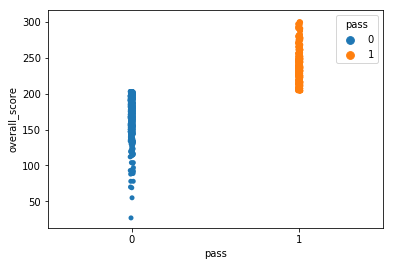

In [6]:
ax = sns.stripplot(x="pass", y="overall_score", hue="pass",data=df, jitter=.01)

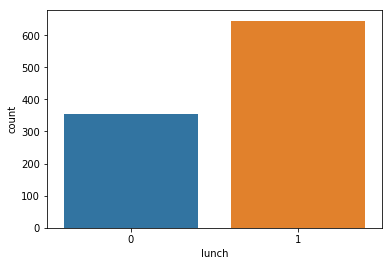

In [7]:
ax = sns.countplot(x="lunch", data=df)
plt.rcParams['figure.figsize'] = (10,10)

In [8]:
df['pass'].value_counts()

1    526
0    474
Name: pass, dtype: int64

In [9]:
df.head(1)

,Gender,race/ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,overall_score,pass
0,1,group B,bachelor's degree,1,0,72,72,74,218,1


D:\School\Spring2019\IntroPython\PythonInstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


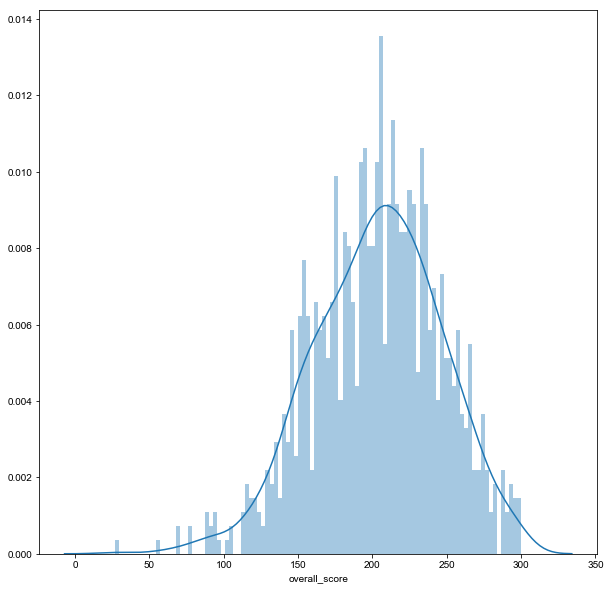

In [10]:
sns.distplot(df['overall_score'],bins=100)
sns.set(font_scale=2)

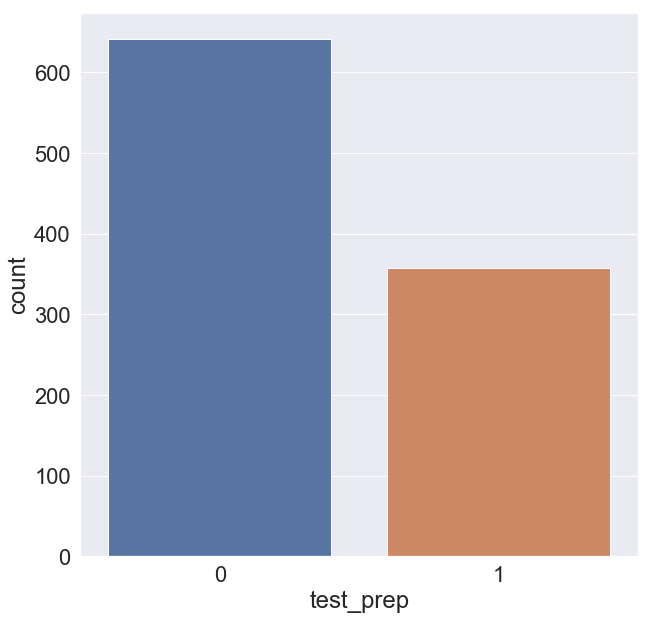

In [11]:
ax = sns.countplot(x="test_prep", data=df)

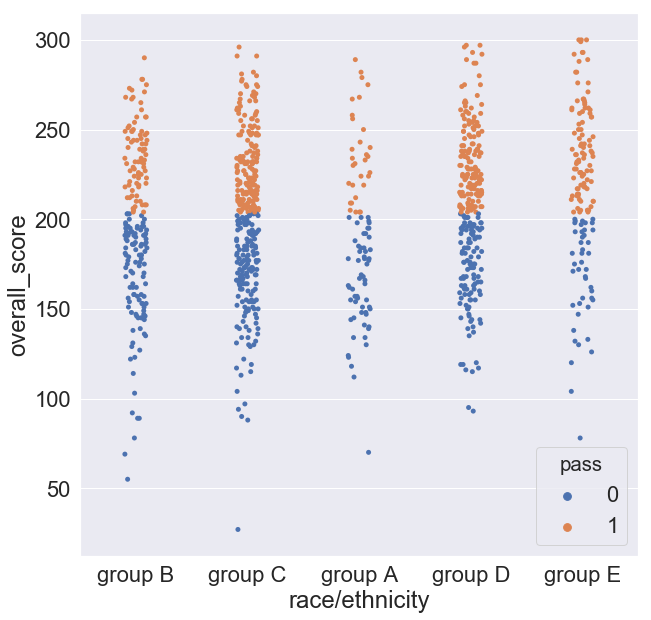

In [12]:
ax = sns.stripplot(x="race/ethnicity", y="overall_score",hue="pass", data=df)

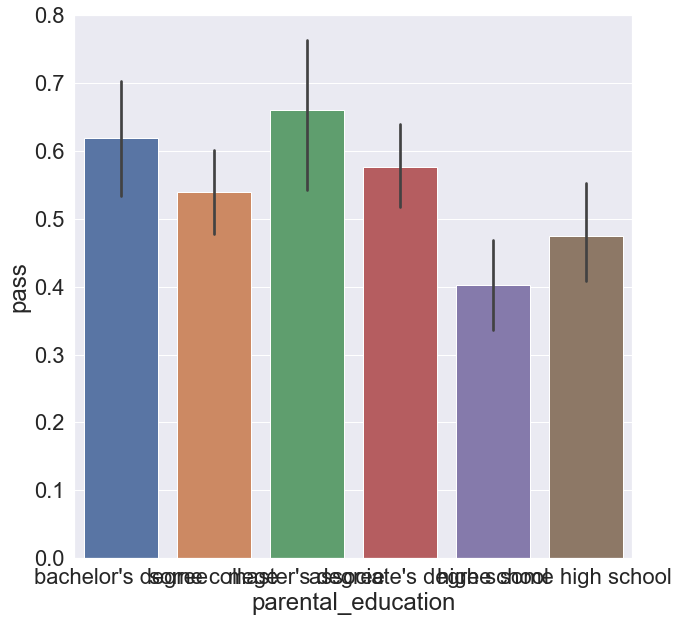

In [13]:
ax = sns.barplot(x="parental_education", y="pass", data=df)

In [14]:
df.head(1)

,Gender,race/ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,overall_score,pass
0,1,group B,bachelor's degree,1,0,72,72,74,218,1


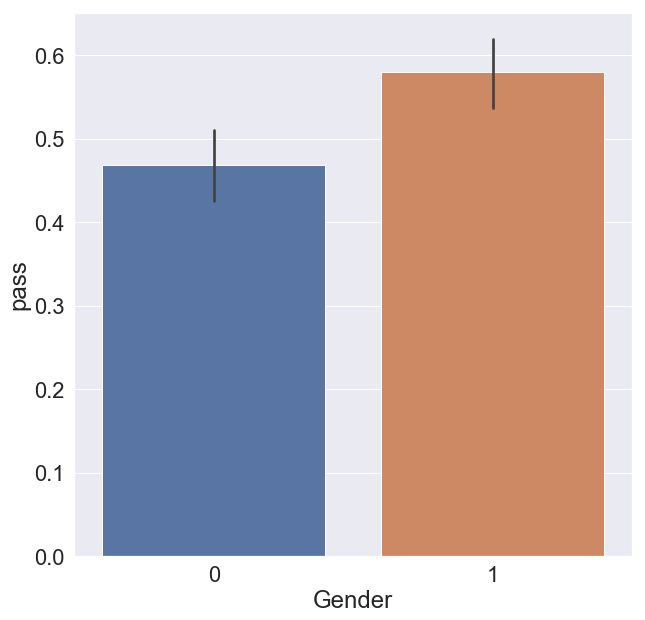

In [15]:
ax = sns.barplot(x="Gender", y="pass", data=df)

In [16]:
df[df.columns[1:]].corr(method= 'pearson')['pass'][:]

lunch            0.220690
test_prep        0.224294
math_score       0.729856
reading_score    0.781864
writing_score    0.772124
overall_score    0.799943
pass             1.000000
Name: pass, dtype: float64

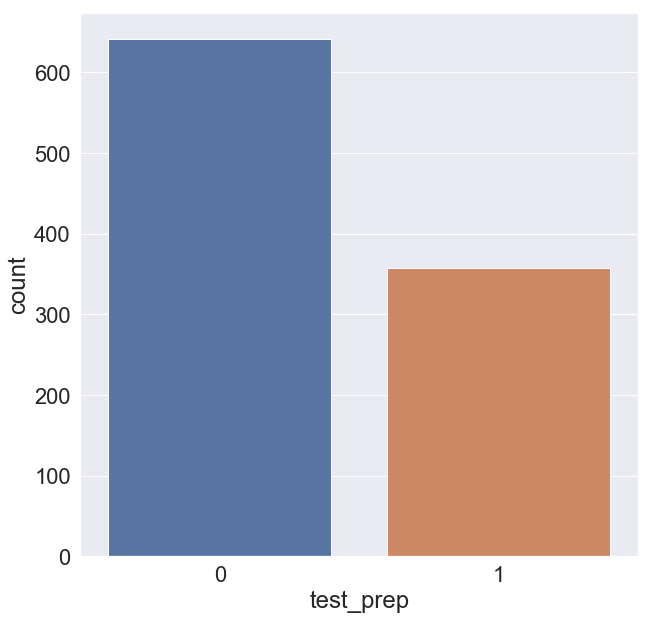

In [17]:
hax = sns.countplot(x="test_prep", data=df)

In [18]:
df.head(1)

,Gender,race/ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,overall_score,pass
0,1,group B,bachelor's degree,1,0,72,72,74,218,1


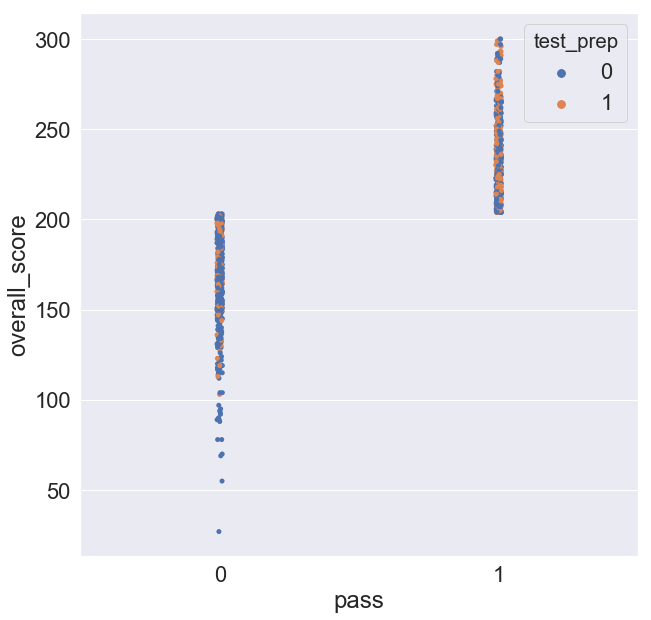

In [19]:
ax = sns.stripplot(x="pass", y="overall_score", hue="test_prep",data=df, jitter=.01)

In [20]:
df.head(1)

,Gender,race/ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,overall_score,pass
0,1,group B,bachelor's degree,1,0,72,72,74,218,1


In [21]:
x = df.drop(columns=['pass','math_score','reading_score','writing_score','overall_score'])

In [22]:
x.head(1)

,Gender,race/ethnicity,parental_education,lunch,test_prep
0,1,group B,bachelor's degree,1,0


In [23]:
y = df['pass'].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [25]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [26]:
knn.fit(x_train,y_train)

ValueError: could not convert string to float: 'group E'

THIS IS JUST AN ERROR BECAUSE THE NEW DATASET IS DUMMY IT WORKED WITH THE ORIGINAL AND I ALREADY GOT THE MODELS OUT OF IT. I JUST INCLUDED THIS CODE SO YOU COULD SEE I DID DO KNN

In [ ]:
knn.predict(x_test)[0:5]

In [ ]:
knn.score(x_test, y_test)

In [ ]:
knn_cv = KNeighborsClassifier(n_neighbors=3)

In [ ]:
cv_scores = cross_val_score(knn_cv, x, y, cv=5)

In [ ]:
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

In [ ]:
k_range = range(1, 10)

In [ ]:
scores = []

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

In [ ]:
ax = sns.lineplot(x=k_range, y=scores)
ax.set(xlabel='Value of K', ylabel='Level of Accuracy')

In [ ]:
x.head(1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x, y)

In [ ]:
knn.predict([[1, 5, 6,1,1]])

In [ ]:
g = sns.FacetGrid(df, row="Gender", col="parental_education", margin_titles=True)

g.map(plt.hist, "pass", color="steelblue", bins=50)